In [583]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [584]:
df = pd.read_csv('C:\data\Springboard\data_wrangling\MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


# Examining the size of the dataframe and the number of nulls per column. The metadata states that null values in the admission column are rejections. 

In [586]:
print('\nDataframe shape:\n')
df.shape
print('\nDataframe nulls by column:\n')
df.isna().sum()


Dataframe shape:



(6194, 10)


Dataframe nulls by column:



application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [587]:
df.groupby('admission').size()
df['admission'].unique()

admission
Admit       900
Waitlist    100
dtype: int64

array(['Admit', nan, 'Waitlist'], dtype=object)

The reason the above output shows a small portion of outcomes is because denials are denoted as nulls here. That is why We will replace the null values with "Deny" in the admission column.

In [589]:
df['admission'] = df['admission'].fillna('Deny')
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,Deny
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,Deny
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,Deny


### Here we take a look to examine if the rows with nulls for race differ in any apparent way, which the output below gives no evidence for.

In [591]:
print('\nDataframe where race is null everywhere:\n')
df_race_nan = df[df['race'].isna()]
df_race_nan


Dataframe where race is null everywhere:



,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
7,8,Male,True,3.02,Business,NaN,630.0,6.0,Financial Services,Deny
11,12,Male,True,2.85,Humanities,NaN,580.0,4.0,PE/VC,Deny
15,16,Female,True,3.05,Humanities,NaN,710.0,4.0,Consulting,Admit
19,20,Male,True,3.09,Business,NaN,670.0,8.0,Consulting,Deny
...,...,...,...,...,...,...,...,...,...,...
6167,6168,Male,True,3.24,Business,NaN,570.0,4.0,Consulting,Deny
6176,6177,Female,True,3.29,Business,NaN,640.0,5.0,Technology,Deny
6186,6187,Male,True,3.23,Humanities,NaN,610.0,7.0,Financial Services,Deny
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit


## Looking at the distributions of majors, first table when race is nan and second table is for all rows

In [593]:
df_race_nan.groupby('major').size()
df.groupby('major').size()

major
Business      563
Humanities    721
STEM          558
dtype: int64

major
Business      1838
Humanities    2481
STEM          1875
dtype: int64

# Examining values in the admission column after removing the null and replacing them with denials

In [595]:
df['admission'].unique()
df['admission'].nunique()
df.groupby('admission').size()

array(['Admit', 'Deny', 'Waitlist'], dtype=object)

3

admission
Admit        900
Deny        5194
Waitlist     100
dtype: int64

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


## Let's look at the distributions of some of the variables in the table:



gender
Male      3943
Female    2251
Name: count, dtype: int64


<Axes: xlabel='gender'>

Text(0.5, 0, 'gender')

Text(0, 0.5, 'count')

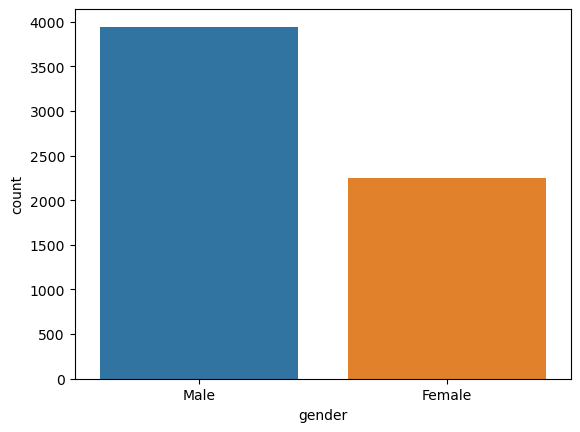



international
False    4352
True     1842
Name: count, dtype: int64


<Axes: xlabel='international'>

Text(0.5, 0, 'international')

Text(0, 0.5, 'count')

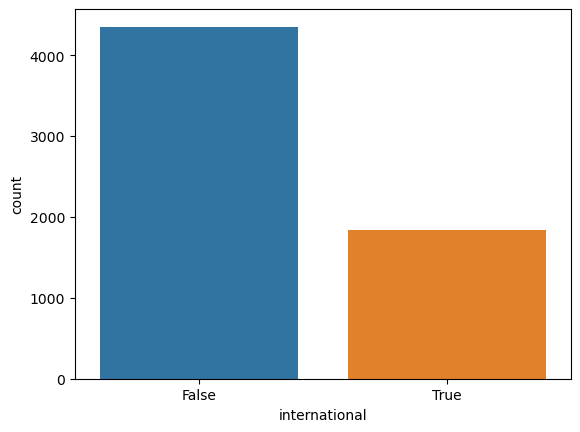



major
Humanities    2481
STEM          1875
Business      1838
Name: count, dtype: int64


<Axes: xlabel='major'>

Text(0.5, 0, 'major')

Text(0, 0.5, 'count')

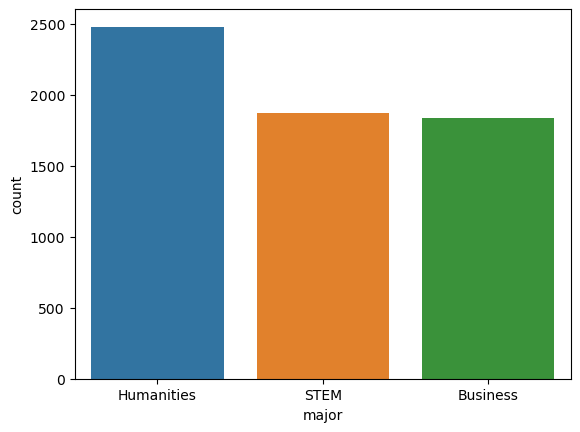



race
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


<Axes: xlabel='race'>

Text(0.5, 0, 'race')

Text(0, 0.5, 'count')

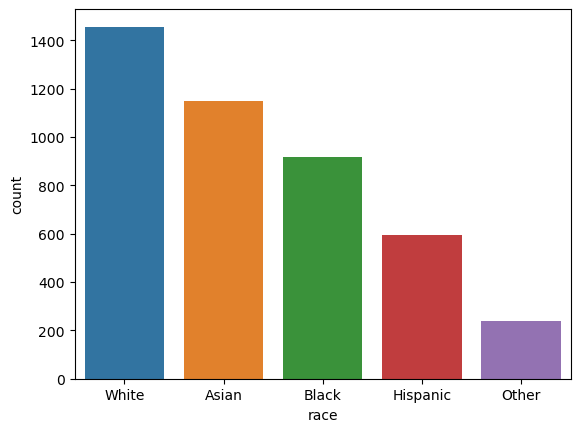



work_industry
Consulting               1619
PE/VC                     907
Technology                716
Nonprofit/Gov             651
Investment Banking        580
Financial Services        451
Other                     421
Health Care               334
Investment Management     166
CPG                       114
Real Estate               111
Media/Entertainment        59
Retail                     33
Energy                     32
Name: count, dtype: int64


<Axes: xlabel='work_industry'>

Text(0.5, 0, 'work_industry')

Text(0, 0.5, 'count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Consulting'),
  Text(1, 0, 'PE/VC'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Nonprofit/Gov'),
  Text(4, 0, 'Investment Banking'),
  Text(5, 0, 'Financial Services'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Health Care'),
  Text(8, 0, 'Investment Management'),
  Text(9, 0, 'CPG'),
  Text(10, 0, 'Real Estate'),
  Text(11, 0, 'Media/Entertainment'),
  Text(12, 0, 'Retail'),
  Text(13, 0, 'Energy')])

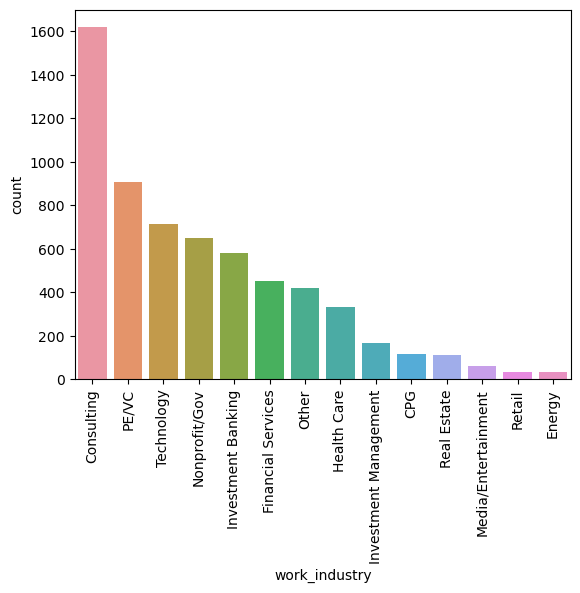

In [598]:
vars = ['gender', 'international', 'major', 'race', 'work_industry']
for i in vars:
    print('\n')
    print(df[i].value_counts())
    sns.barplot(x = df[i].value_counts().index, y = df[i].value_counts().values)
    plt.xlabel(i)
    plt.ylabel('count')
    if i == 'work_industry':
        plt.xticks(rotation = 90)
    plt.show();

Histogram of GPA


<Axes: >

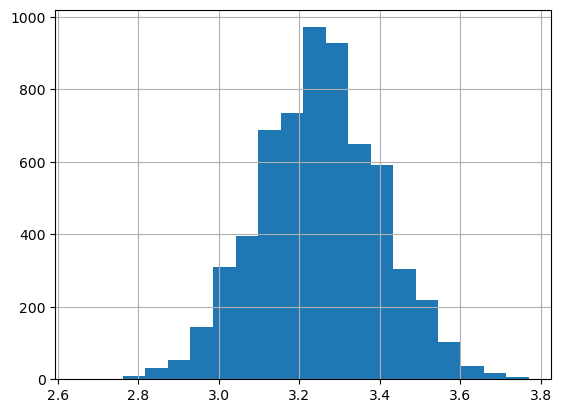


Histogram of work experience years


<Axes: >

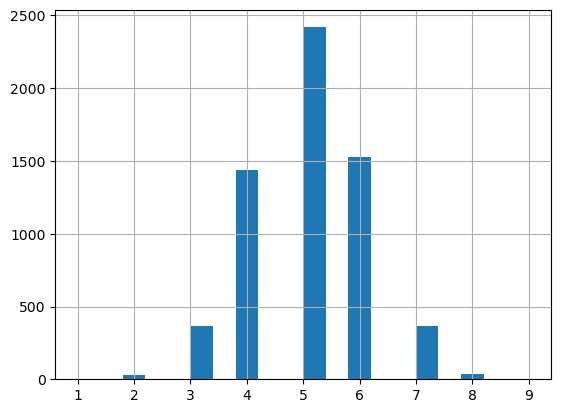


Histogram of GMAT


<Axes: >

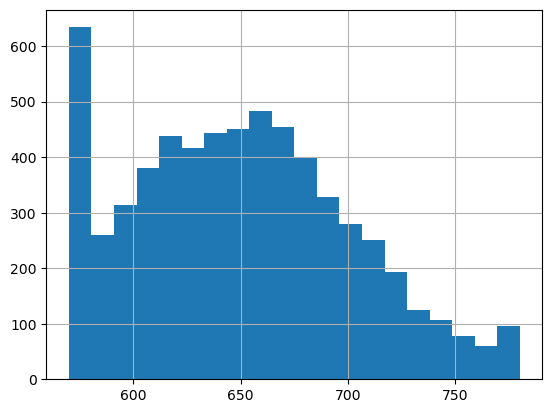

In [599]:
print('Histogram of GPA')
df['gpa'].hist(bins = 20)
plt.show()
print('\nHistogram of work experience years')
df['work_exp'].hist(bins = 20)
plt.show()
print('\nHistogram of GMAT')
df['gmat'].hist(bins = 20)
plt.show()

## Performing a sanity check to make sure there are no nonsensical values in any of the columns

In [601]:
df.loc[:, df.columns != 'application_id'].describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,6194.0,3.250714,0.151541,2.65,3.15,3.25,3.35,3.77
gmat,6194.0,651.092993,49.294883,570.00,610.00,650.00,680.00,780.00
work_exp,6194.0,5.016952,1.032432,1.00,4.00,5.00,6.00,9.00


In [602]:
categorical_vars = ['gender', 'international', 'major', 'race', 'work_exp', 'work_industry']
df.columns
df['work_exp'].unique()

Index(['application_id', 'gender', 'international', 'gpa', 'major', 'race',
       'gmat', 'work_exp', 'work_industry', 'admission'],
      dtype='object')

array([3., 5., 6., 2., 4., 8., 7., 9., 1.])

In [603]:
dictionary = {}

for var in categorical_vars:
    for val in df[var].unique():
        percent_admitted = 100*(df[df[var] == val]['admission'] == 'Admit').mean()
        dict_key = var + ': ' + str(val)
        dictionary[dict_key] = percent_admitted

In [604]:
percent_admitted_df = pd.DataFrame(list(dictionary.items()), columns = ['Variable Category', 'Percent Accepted'])
percent_admitted_df

,Variable Category,Percent Accepted
0,gender: Female,19.991115
1,gender: Male,11.412630
2,international: False,14.292279
3,international: True,15.092291
4,major: Business,14.689880
5,major: Humanities,14.792422
6,major: STEM,14.026667
7,race: Asian,16.564952
8,race: Black,8.733624
9,race: nan,NaN


In [605]:
100*(df[df['race'].isna()]['admission'] == 'Admit').mean()

15.092290988056462

We can see from the output that there must be a technical issue with giving the percentage of applicants accepted when the value for the race variable is not provided. In the cell right above we are explicitly examining this and we are given a concrete percentage that looks very realistic. Let's just replace it manually.

In [607]:
percent_admitted_df.loc[percent_admitted_df['Variable Category'] == 'race: nan', 'Percent Accepted'] = 100*(df[df['race'].isna()]['admission'] == 'Admit').mean()
percent_admitted_df

,Variable Category,Percent Accepted
0,gender: Female,19.991115
1,gender: Male,11.412630
2,international: False,14.292279
3,international: True,15.092291
4,major: Business,14.689880
5,major: Humanities,14.792422
6,major: STEM,14.026667
7,race: Asian,16.564952
8,race: Black,8.733624
9,race: nan,15.092291
